In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import dot_classifier
reload(dot_classifier)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)

x = np.arange(4)
K = thomas_fermi.create_K_matrix(x,E_scale=1e-3)

battery_ind = []

V = np.array([5e-3,2e-3,2e-3,5e-3])
mu_l = (10e-3,10e-3+0.1e-3)
    
graph_model = (10,1)
battery_weight = 1000
kT = 20e-6
physics = (x,V,K,mu_l,battery_weight,kT)

G = markov_graph.generate_graph(graph_model, physics)
battery_ind = markov_graph.get_battery_nodes(G)

I_vec = markov_graph.get_current(G,battery_ind)

> /Users/ssk4/quantum-ml/ndot/lib/dot_classifier_tf.py(61)get_mask()
-> n = solve_thomas_fermi_fixed_mu(x,V,K,mu)


KeyboardInterrupt: 

In [7]:
I_vec

(2.3692084186936407e-05+0j)

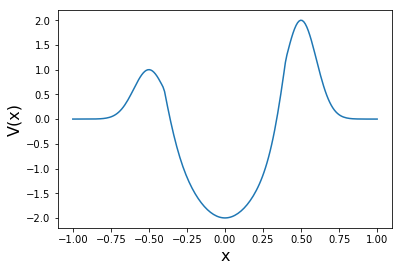

In [41]:
-
N_grid = 200
x = np.linspace(-1,1,N_grid)

d = (0.4,2)
b1 = (2,0.5,0.1)
b2 = (1,-0.5,0.1)

V = single_dot_V_x(x,d,b1,b2)

plt.plot(x,V)
plt.xlabel('x',fontsize=16)
plt.ylabel('V(x)',fontsize=16)

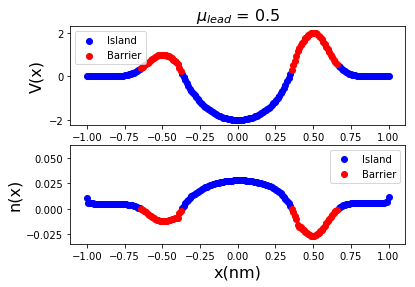

In [42]:
import sys
sys.path.append('/Users/ssk4/quantum-ml/dot_classifier_tf/')
import classify_tf
reload(classify_tf)

K = classify_tf.create_K_matrix(x,E_scale=0.1,sigma=0.5*(x[1] - x[0]))
#K = np.identity(len(x))
mu = 0.5
n = classify_tf.solve_thomas_fermi_fixed_mu(x,V,K,mu)


def classify_n(n,tol=1e-1):
    if n < 0:
        return 'b'
    else:
        return 'd'
mask = map(classify_n,n)

islands = np.where(n > 0)
barriers = np.where(n < 0)

fig,axarr = plt.subplots(2)
axarr[0].scatter(x[islands],V[islands],color='b')
axarr[0].scatter(x[barriers],V[barriers],color='r')
axarr[0].legend(('Island','Barrier'))
axarr[0].set_xlabel('x(nm)',fontsize=16)
axarr[0].set_ylabel('V(x)',fontsize=16)
axarr[0].set_title(r'$\mu_{lead}$ = ' + str(mu),fontsize=16)

ar = axarr[1].scatter(x[islands],n[islands],color='b')
ar = axarr[1].scatter(x[barriers],n[barriers],color='r')
axarr[1].legend(('Island','Barrier'))
axarr[1].set_xlabel('x(nm)',fontsize=16)
axarr[1].set_ylabel('n(x)',fontsize=16)


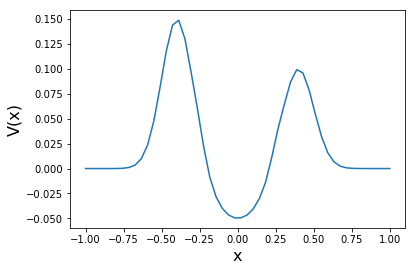

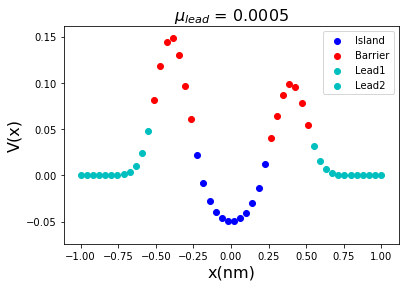

In [26]:
import numpy as np
import dot_classifier_tf
reload(dot_classifier_tf)
import potential_profile
reload(potential_profile)

N_grid = 50
x = np.linspace(-1,1,N_grid)

d = (0.25,-50e-3)
b1 = (100e-3,0.4,0.1)
b2 = (150e-3,-0.4,0.1)

V = potential_profile.single_dot_V_x(x,d,b1,b2)

plt.figure(1)
plt.plot(x,V)
plt.xlabel('x',fontsize=16)
plt.ylabel('V(x)',fontsize=16)

K = dot_classifier_tf.create_K_matrix(x,E_scale=0.5e-3,sigma=(x[1] - x[0]))
#K = np.identity(len(x))
mu = 0.5e-3

mask = dot_classifier_tf.get_mask(x,V,K,mu)

plt.figure(2)
lead1 = [i for i, ele in enumerate(mask) if ele == 'l1']
lead2 = [i for i, ele in enumerate(mask) if ele == 'l2']
barrier = [i for i, ele in enumerate(mask) if ele == 'b']
dot = [i for i, ele in enumerate(mask) if ele == 'd']

plt.scatter(x[dot],V[dot],color='b')
plt.scatter(x[barrier],V[barrier],color='r')
plt.scatter(x[lead1],V[lead1],color='c')
plt.scatter(x[lead2],V[lead2],color='c')
plt.legend(('Island','Barrier','Lead1','Lead2'))
plt.xlabel('x(nm)',fontsize=16)
plt.ylabel('V(x)',fontsize=16)
plt.title(r'$\mu_{lead}$ = ' + str(mu),fontsize=16)

import dot_classifier
reload(dot_classifier)

mask = dot_classifier.get_mask(x,V,K,mu)
dot_info = dot_classifier.get_dot_info(mask)

In [84]:
dot_info

{0: [31, 67]}